In [ ]:
#dataurl = 'https://drive.google.com/file/d/1iyqU2SZhLR62NQaBVONiOG4tYBc_EAL0/view?usp=sharing'
#!gdown --id 1iyqU2SZhLR62NQaBVONiOG4tYBc_EAL0

Downloading...
From: https://drive.google.com/uc?id=1iyqU2SZhLR62NQaBVONiOG4tYBc_EAL0
To: /content/Titanic_dataset.zip
100% 23.8k/23.8k [00:00<00:00, 32.9MB/s]


In [ ]:
#!unzip Titanic_dataset.zip

Archive:  Titanic_dataset.zip
  inflating: train.csv               
  inflating: description.txt         
  inflating: test.csv                


In [1]:
import numpy as np
import pandas as pd

In [2]:
def load_data():
  train_df = pd.read_csv('titanic_dataset/train.csv')
  test_df = pd.read_csv('titanic_dataset/test.csv')
  return train_df, test_df

In [3]:
train_df, test_df = load_data()

In [4]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,566.000000,712.000000,712.000000,712.000000
mean,449.515449,0.383427,2.296348,29.704806,0.515449,0.376404,32.577100
std,255.061642,0.486563,0.832253,14.603712,1.093280,0.800073,51.860649
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,230.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,448.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.250000,1.000000,3.000000,37.000000,1.000000,0.000000,31.068750
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 2. Clean data

In [7]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            146
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          545
Embarked         2
dtype: int64

In [8]:
mage = train_df['Age'].mean()
train_df['Age'] = train_df['Age'].fillna(mage)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,75,1,3,"Bing, Mr. Lee",male,32.000000,0,0,1601,56.4958,NaN,S
1,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.000000,0,0,A/5 3540,8.0500,NaN,S
2,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.000000,4,2,347077,31.3875,NaN,S
3,634,0,1,"Parr, Mr. William Henry Marsh",male,29.704806,0,0,112052,0.0000,NaN,S
4,844,0,3,"Lemberopolous, Mr. Peter L",male,34.500000,0,0,2683,6.4375,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
707,145,0,2,"Andrew, Mr. Edgardo Samuel",male,18.000000,0,0,231945,11.5000,NaN,S
708,614,0,3,"Horgan, Mr. John",male,29.704806,0,0,370377,7.7500,NaN,Q
709,578,1,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.000000,1,0,13507,55.9000,E44,S
710,702,1,1,"Silverthorne, Mr. Spencer Victor",male,35.000000,0,0,PC 17475,26.2875,E24,S


In [ ]:
moEmb = train_df['Embarked'].mode()[0]
train_df['Embarked'].fillna(moEmb)

0      S
1      S
2      S
3      S
4      C
      ..
707    S
708    Q
709    S
710    S
711    S
Name: Embarked, Length: 712, dtype: object

In [ ]:
def clean_data(df):
  df['Cabin'] = df['Cabin'].fillna(0)
  df['Age'] = df['Age'].fillna(df['Age'].mean())
  df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
  return df

In [ ]:
clean_train_df = clean_data(train_df)
clean_train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
def split_data_label(df):
  label = df['Survived']
  data = df.drop('Survived', axis=1)
  return data, label

In [ ]:
train_data, train_label = split_data_label(clean_data(train_df))

In [ ]:
test_data, test_label = split_data_label(clean_data(test_df))

# 3. Extract features

In [ ]:
train_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,75,3,"Bing, Mr. Lee",male,32.000000,0,0,1601,56.4958,C23 C25 C27,S
1,205,3,"Cohen, Mr. Gurshon ""Gus""",male,18.000000,0,0,A/5 3540,8.0500,0,S
2,234,3,"Asplund, Miss. Lillian Gertrud",female,5.000000,4,2,347077,31.3875,0,S
3,634,1,"Parr, Mr. William Henry Marsh",male,29.704806,0,0,112052,0.0000,0,S
4,844,3,"Lemberopolous, Mr. Peter L",male,34.500000,0,0,2683,6.4375,0,C


3.1 get numeric


In [ ]:
trainfeat = train_data._get_numeric_data()
trainfeat.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,449.515449,2.296348,29.704806,0.515449,0.376404,32.577100
std,255.061642,0.832253,13.018252,1.093280,0.800073,51.860649
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,230.750000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,448.500000,3.000000,29.704806,0.000000,0.000000,14.454200
75%,668.250000,3.000000,35.000000,1.000000,0.000000,31.068750
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


3.2 embarked flag

In [ ]:
train_data['Embarked'].value_counts()

S    513
C    140
Q     59
Name: Embarked, dtype: int64

In [ ]:
trembFlag = pd.get_dummies(train_data['Embarked'])
trainfeat = pd.concat([train_data,trembFlag],axis=1)
trainfeat = trainfeat._get_numeric_data()
trainfeat

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,Q,S
0,75,3,32.000000,0,0,56.4958,0,0,1
1,205,3,18.000000,0,0,8.0500,0,0,1
2,234,3,5.000000,4,2,31.3875,0,0,1
3,634,1,29.704806,0,0,0.0000,0,0,1
4,844,3,34.500000,0,0,6.4375,1,0,0
...,...,...,...,...,...,...,...,...,...
707,145,2,18.000000,0,0,11.5000,0,0,1
708,614,3,29.704806,0,0,7.7500,0,1,0
709,578,1,39.000000,1,0,55.9000,0,0,1
710,702,1,35.000000,0,0,26.2875,0,0,1


3.3 male flag

In [ ]:
train_data['male'] = (train_data['Sex']=='male').astype('int')
train_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,75,3,"Bing, Mr. Lee",male,32.000000,0,0,1601,56.4958,C23 C25 C27,S,1
1,205,3,"Cohen, Mr. Gurshon ""Gus""",male,18.000000,0,0,A/5 3540,8.0500,0,S,1
2,234,3,"Asplund, Miss. Lillian Gertrud",female,5.000000,4,2,347077,31.3875,0,S,0
3,634,1,"Parr, Mr. William Henry Marsh",male,29.704806,0,0,112052,0.0000,0,S,1
4,844,3,"Lemberopolous, Mr. Peter L",male,34.500000,0,0,2683,6.4375,0,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...
707,145,2,"Andrew, Mr. Edgardo Samuel",male,18.000000,0,0,231945,11.5000,0,S,1
708,614,3,"Horgan, Mr. John",male,29.704806,0,0,370377,7.7500,0,Q,1
709,578,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.000000,1,0,13507,55.9000,E44,S,0
710,702,1,"Silverthorne, Mr. Spencer Victor",male,35.000000,0,0,PC 17475,26.2875,E24,S,1


In [ ]:
trainfeat = train_data._get_numeric_data()
trainfeat

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male
0,75,3,32.000000,0,0,56.4958,1
1,205,3,18.000000,0,0,8.0500,1
2,234,3,5.000000,4,2,31.3875,0
3,634,1,29.704806,0,0,0.0000,1
4,844,3,34.500000,0,0,6.4375,1
...,...,...,...,...,...,...,...
707,145,2,18.000000,0,0,11.5000,1
708,614,3,29.704806,0,0,7.7500,1
709,578,1,39.000000,1,0,55.9000,0
710,702,1,35.000000,0,0,26.2875,1


3.4 title one hot

In [ ]:
trNameList = train_data['Name'].values
teNameList = test_data['Name'].values

In [ ]:
def getinitiallist(nameList):
  initialList = []
  for i in range(len(nameList)):
    initialList.append(nameList[i].split(',')[1].split('.')[0].strip())
  return initialList

In [ ]:
getinitiallist(trNameList)

['Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Major',
 'Master',
 'Miss',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Mr',
 'Mr',
 'Miss',
 'Rev',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Master',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Master',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Miss',
 'Rev',
 'Mr',
 'Mr',
 'Mrs',
 'Rev',
 'Mr',
 'Master',
 'Miss',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Dr',
 'Mr',
 'Miss',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Dr',
 'Mr',
 'Jonkheer',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',


In [ ]:
trini = getinitiallist(trNameList)
train_df['initial'] = trini
trini_flag = pd.get_dummies(train_df['initial'])
trini_flag

,Capt,Col,Dr,Jonkheer,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0,0,0,0,0,0,0,0,0,1,0,0,0,0
708,0,0,0,0,0,0,0,0,0,1,0,0,0,0
709,0,0,0,0,0,0,0,0,0,0,1,0,0,0
710,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
teini = getinitiallist(teNameList)
test_df['initial'] = teini
teini_flag = pd.get_dummies(test_df['initial'])
teini_flag

,Don,Dr,Lady,Master,Miss,Mr,Mrs,Rev,the Countess
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
174,0,0,0,0,0,1,0,0,0
175,0,0,0,0,0,0,1,0,0
176,0,0,0,0,0,1,0,0,0
177,0,0,0,0,0,1,0,0,0


In [ ]:
sTrIni = set(trini_flag.columns)
sTeIni = set(teini_flag.columns)
commonTitleFlag = list(sTrIni.intersection(sTeIni))
commonTitleFlag

['Rev', 'Miss', 'Mrs', 'Dr', 'Master', 'Mr']

In [ ]:
trini_flag[commonTitleFlag]

,Rev,Miss,Mrs,Dr,Master,Mr
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,1,0,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
707,0,0,0,0,0,1
708,0,0,0,0,0,1
709,0,0,1,0,0,0
710,0,0,0,0,0,1


In [ ]:
nameList = train_data['Name']
titleList = getinitiallist(nameList)
dini = pd.get_dummies(titleList)
dini = dini[['Rev', 'Miss', 'Mrs', 'Dr', 'Master', 'Mr']]
trainfeat = pd.concat([train_data,dini],axis=1)
trainfeat = trainfeat._get_numeric_data()
trainfeat

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Rev,Miss,Mrs,Dr,Master,Mr
0,75,3,32.000000,0,0,56.4958,1,0,0,0,0,0,1
1,205,3,18.000000,0,0,8.0500,1,0,0,0,0,0,1
2,234,3,5.000000,4,2,31.3875,0,0,1,0,0,0,0
3,634,1,29.704806,0,0,0.0000,1,0,0,0,0,0,1
4,844,3,34.500000,0,0,6.4375,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,145,2,18.000000,0,0,11.5000,1,0,0,0,0,0,1
708,614,3,29.704806,0,0,7.7500,1,0,0,0,0,0,1
709,578,1,39.000000,1,0,55.9000,0,0,0,1,0,0,0
710,702,1,35.000000,0,0,26.2875,1,0,0,0,0,0,1


3.5 Get number type tickets flag

In [ ]:
def getnumticket(ticketList):
  numticket = []
  for i in range(len(ticketList)):
    try:
      int(ticketList[i])
      numticket.append(1)
    except:
      numticket.append(0)
  return numticket

In [ ]:
ticketList = train_data['Ticket'].values
getnumticket(ticketList)

[1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,


3.6 Quantize fare

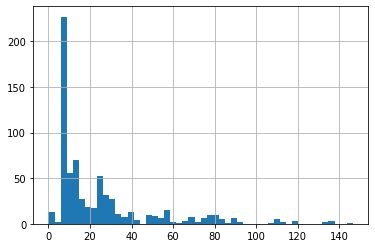

In [ ]:
train_df['Fare'][train_df['Fare']<150].hist(bins=50)

In [ ]:
(train_df['Fare']<25).astype('int')
((train_df['Fare']>=25) & (train_df['Fare']<50)).astype('int')
((train_df['Fare']>=50) & (train_df['Fare']<50)).astype('int')
(train_df['Fare']>=75).astype('int')

0      0
1      0
2      0
3      0
4      0
      ..
707    0
708    0
709    0
710    0
711    0
Name: Fare, Length: 712, dtype: int64

In [ ]:
#pd.cut(train_df['Fare'], bins = [-1, 25, 50, 75, 100,600],labels=['A', 'B', 'C', 'D','E'])

0      C
1      A
2      B
3      A
4      A
      ..
707    A
708    A
709    C
710    B
711    C
Name: Fare, Length: 712, dtype: category
Categories (5, object): [A < B < C < D < E]

In [ ]:
from sklearn.preprocessing import normalize
normalize(trainfeat)

array([[0.75562099, 0.03022484, 0.32239829, ..., 0.        , 0.        ,
        0.01007495],
       [0.99527695, 0.01456503, 0.08739017, ..., 0.        , 0.        ,
        0.00485501],
       [0.99063494, 0.01270045, 0.02116741, ..., 0.        , 0.        ,
        0.00423348],
       ...,
       [0.99311423, 0.00171819, 0.06700944, ..., 0.        , 0.        ,
        0.00171819],
       [0.99805861, 0.00142174, 0.04976076, ..., 0.        , 0.        ,
        0.00142174],
       [0.99262606, 0.00583898, 0.05060447, ..., 0.        , 0.        ,
        0.00194633]])

In [ ]:
from sklearn.preprocessing import normalize
def extract_feat(df):
  feat = df.copy()
  feat = feat.drop('PassengerId', axis=1)

  #feat = feat._get_numeric_data()
  #return feat
  
  #return feat

  #embFlag = pd.get_dummies(feat['Embarked'])
  #feat = pd.concat([feat,embFlag],axis=1)

  ## get male
  feat['male'] = (feat['Sex']=='male').astype('int')
  feat = feat._get_numeric_data()
  return feat
  
  ## get initial
  #nameList = df['Name']
  #feat['initial'] = getinitiallist(nameList)
  #dini = pd.get_dummies(feat['initial'])
  #dini = dini[['Rev', 'Miss', 'Mrs', 'Dr', 'Master', 'Mr']]
  #feat = pd.concat([feat,dini],axis=1)

  #feat['numticket'] = getnumticket(ticketList)
  #feat['lenname'] = 1/df['Name'].str.len()

  ## quantize fare
  #feat['f1'] = (df['Fare']<25).astype('int')
  #feat['f2'] = ((df['Fare']>=25) & (df['Fare']<50)).astype('int')
  #feat['f3'] = ((df['Fare']>=50) & (df['Fare']<75)).astype('int')
  #feat['f4'] = (df['Fare']>=75).astype('int')

  #feat = normalize(feat)
  

In [ ]:
train_feat = extract_feat(train_data)
train_feat
#test_feat = extract_feat(test_data)
#test_feat

,Pclass,Age,SibSp,Parch,Fare
0,3,32.000000,0,0,56.4958
1,3,18.000000,0,0,8.0500
2,3,5.000000,4,2,31.3875
3,1,29.704806,0,0,0.0000
4,3,34.500000,0,0,6.4375
...,...,...,...,...,...
707,2,18.000000,0,0,11.5000
708,3,29.704806,0,0,7.7500
709,1,39.000000,1,0,55.9000
710,1,35.000000,0,0,26.2875


In [ ]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial
0,699,1,"Thayer, Mr. John Borland",male,32.000000,1,1,17421,110.8833,C68,C,Mr
1,741,1,"Hawksford, Mr. Walter James",male,18.000000,0,0,16988,30.0000,D45,S,Mr
2,769,3,"Moran, Mr. Daniel J",male,5.000000,1,0,371110,24.1500,null,Q,Mr
3,622,1,"Kimball, Mr. Edwin Nelson Jr",male,29.704806,1,0,11753,52.5542,D19,S,Mr
4,11,3,"Sandstrom, Miss. Marguerite Rut",female,34.500000,1,1,PP 9549,16.7000,G6,S,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...
174,546,1,"Nicholson, Mr. Arthur Ernest",male,24.000000,0,0,693,26.0000,null,S,Mr
175,248,2,"Hamalainen, Mrs. William (Anna)",female,39.000000,0,2,250649,14.5000,null,S,Mrs
176,434,3,"Kallio, Mr. Nikolai Erland",male,28.000000,0,0,STON/O 2. 3101274,7.1250,null,S,Mr
177,35,1,"Meyer, Mr. Edgar Joseph",male,29.704806,1,0,PC 17604,82.1708,null,C,Mr


# 4. Train model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
def train_mod(feat, label):
  model = GradientBoostingClassifier(random_state=100)
  model.fit(feat, label)
  return model

In [ ]:
model = train_model(train_feat, train_label)

In [ ]:
sum(test_label==0)/len(test_label)

0.6145251396648045

# 5. Evaluate model

In [ ]:
def eval_acc(prediction, actual):
  acc = sum(prediction == actual) / len(actual)
  return acc

In [ ]:
test_feat

,Pclass,Age,SibSp,Parch,Fare
0,1,32.000000,1,1,110.8833
1,1,18.000000,0,0,30.0000
2,3,5.000000,1,0,24.1500
3,1,29.704806,1,0,52.5542
4,3,34.500000,1,1,16.7000
...,...,...,...,...,...
174,1,24.000000,0,0,26.0000
175,2,39.000000,0,2,14.5000
176,3,28.000000,0,0,7.1250
177,1,29.704806,1,0,82.1708


In [ ]:
prediction = model.predict(train_feat)

#prediction
eval_acc(prediction, train_label)

0.8216292134831461

In [ ]:
sum(test_label==0)/len(test_label)

0.6145251396648045

# 6. Run pipeline

In [ ]:
def run_pipeline():
  # Get data
  train_df, test_df = load_data()

  # Clean & split data
  train_data, train_label = split_data_label(clean_data(train_df))
  test_data, test_label = split_data_label(clean_data(test_df))

  # Extract feature
  train_feat = extract_feat(train_data)
  test_feat = extract_feat(test_data)

  # Train model
  model = train_mod(train_feat, train_label)

  # Prediction
  prediction = model.predict(test_feat)

  # Evaluation
  acc = eval_acc(prediction, test_label)

  return acc

In [ ]:
a = run_pipeline()
a

0.8212290502793296